# Importing Libraries

In [6]:
'''@author Henil Shah
#---------------------'''
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier as cart, plot_tree

# Cleaning and Train Test Split

In [4]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
display(train.head())
display(test.head())

#replacing the number with names in label
names={0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}
train.label.replace(names, inplace=True)
test.label.replace(names, inplace=True)

#addiotional method 
#train['label']= train['label'].map(names)
#test['label']= test['label'].map(names)

s_train = train[:2000]
s_test = test[:500]

X_train = s_train.iloc[:, 1:]
Y_train = np.ravel(s_train.iloc[:,:1])
X_test = s_test.iloc[:, 1:]
Y_test = np.ravel(s_test.iloc[:,:1])

display(X_train)
display(Y_train)
display(X_test)
display(Y_test)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,18,...,54,51,21,0,1,2,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,2,0,40,61,10,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


array(['Pullover', 'Ankle boot', 'Shirt', ..., 'Sneaker', 'Sneaker',
       'Coat'], dtype=object)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,50,168,...,15,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


array(['T-shirt/top', 'Trouser', 'Pullover', 'Pullover', 'Dress',
       'Pullover', 'Bag', 'Shirt', 'Sandal', 'T-shirt/top', 'Dress',
       'Coat', 'Coat', 'Shirt', 'Bag', 'Sandal', 'Shirt', 'Dress',
       'Shirt', 'Coat', 'Coat', 'Coat', 'Pullover', 'Trouser', 'Sandal',
       'Sneaker', 'Bag', 'Coat', 'Coat', 'Trouser', 'Sandal', 'Sneaker',
       'Sneaker', 'Bag', 'Trouser', 'T-shirt/top', 'Ankle boot', 'Bag',
       'T-shirt/top', 'Bag', 'Pullover', 'T-shirt/top', 'Coat', 'Shirt',
       'Pullover', 'T-shirt/top', 'Dress', 'Dress', 'Pullover', 'Dress',
       'Pullover', 'Pullover', 'Ankle boot', 'Dress', 'T-shirt/top',
       'Ankle boot', 'Ankle boot', 'Coat', 'Shirt', 'T-shirt/top', 'Coat',
       'Sandal', 'Coat', 'Shirt', 'Trouser', 'Trouser', 'T-shirt/top',
       'Ankle boot', 'Sandal', 'Pullover', 'Sneaker', 'Dress', 'Coat',
       'Shirt', 'Sandal', 'Sneaker', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Ankle boot', 'Bag', 'Trouser', 'Pullover', 'Coat', 'Bag',
      

# Naives Bayes


Normal Distribution confusion matrix:
 [[31  1  0  0  0  5  0 10  0  0]
 [ 0 32  5  3  3  0  0  0  0  0]
 [ 0  0 40 10  2  0  1  0  0  2]
 [ 0  0  0 43  0  0  0  0  0  3]
 [ 0  0 30  1 28  0  3  0  0  1]
 [ 1  4  0  0  0 20  0 27  0  0]
 [ 0  0 32  7  4  0  2  0  4  0]
 [ 1  0  0  0  0  0  0 51  0  0]
 [ 0  3  8  7  1  0  4  0 28  2]
 [ 0  0  0  1  0  0  1  0  0 38]]

Normal Distribution Accuracy Rate= 0.626

Normal Distribution Error Rate= 0.374
Normal Distribution Classification report
               precision    recall  f1-score   support

  Ankle boot       0.94      0.66      0.78        47
         Bag       0.80      0.74      0.77        43
        Coat       0.35      0.73      0.47        55
       Dress       0.60      0.93      0.73        46
    Pullover       0.74      0.44      0.55        63
      Sandal       0.80      0.38      0.52        52
       Shirt       0.18      0.04      0.07        49
     Sneaker       0.58      0.98      0.73        52
 T-shirt/top      

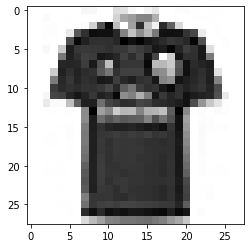

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Probabilities:
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 8.90168834e-293 0.00000000e+000 3.65028280e-196 0.00000000e+000
 1.00000000e+000 0.00000000e+000]
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  1.00 
p(9):  0.00 


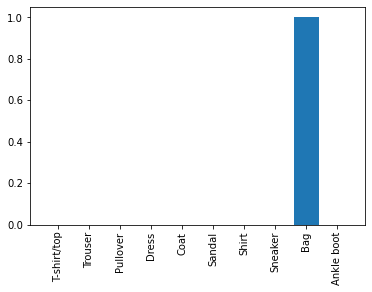

Do you wish to see performance on the next test digit? y/nn


In [5]:
#gaussian 
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
Y_predprob = gnb.predict_proba(X_test)
C_gnb = confusion_matrix(Y_test,Y_pred)
print("\nNormal Distribution confusion matrix:\n", C_gnb)
r_gnb = sum(C_gnb.diagonal())/C_gnb.sum()
print("\nNormal Distribution Accuracy Rate=",r_gnb)
print("\nNormal Distribution Error Rate=",1-r_gnb)
print("Normal Distribution Classification report\n", classification_report(Y_test, Y_pred))

#making a list for x axis
name=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in range(len(Y_test)):    
    if input("Do you wish to see performance on the next test digit? y/n")=='n':       
        break    
    plt.imshow(np.array(X_test.iloc[i]).reshape((28,28)),cmap=plt.cm.binary)    
    plt.show()    
    print("Actual value: ",Y_test[i], "  predicted value: ", Y_pred[i])    
    print("Probabilities:\n", Y_predprob[i])
    print("Predicted probability distribution:\n")    
    [print("p(%d): %5.2f "% (j, Y_predprob[i,j])) for j in range(Y_predprob.shape[1])]    
    plt.bar(height=Y_predprob[i],x=name)
    plt.xticks(rotation = 90)
    plt.show()






Multinomial Distribution confusion matrix:
 [[40  0  0  0  0  5  0  2  0  0]
 [ 0 36  1  2  0  1  3  0  0  0]
 [ 0  0 34  6 11  0  4  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  1]
 [ 0  0 18  0 36  0  8  0  1  0]
 [13  2  0  0  0 15  0 22  0  0]
 [ 0  0 23  4  3  0 10  0  9  0]
 [ 1  0  0  0  0  3  0 48  0  0]
 [ 0  1  1  4  1  0  7  0 39  0]
 [ 0  0  0  1  1  0  0  0  0 38]]

Multinomial Distribution Accuracy Rate= 0.68

Multinomial Distribution Error Rate= 0.31999999999999995

Multinomial Distribution Classification report
               precision    recall  f1-score   support

  Ankle boot       0.74      0.85      0.79        47
         Bag       0.92      0.84      0.88        43
        Coat       0.44      0.62      0.52        55
       Dress       0.72      0.96      0.82        46
    Pullover       0.69      0.57      0.63        63
      Sandal       0.62      0.29      0.39        52
       Shirt       0.31      0.20      0.25        49
     Sneaker       0.67      0.92     

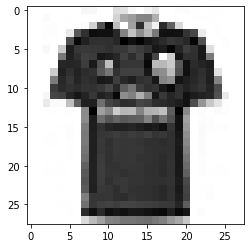

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Probabilities:
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  1.00 
p(9):  0.00 


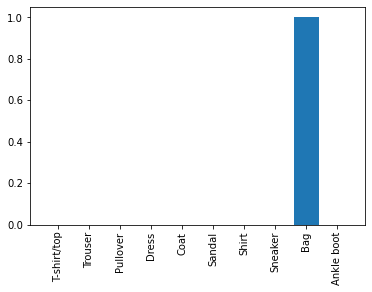

Do you wish to see performance on the next test digit? y/nn


In [6]:
#Multinomial 
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
Y_pred = mnb.predict(np.array(X_test))
Y_predprob = mnb.predict_proba(np.array(X_test))
C_mnb = confusion_matrix(Y_test,Y_pred)
print("\nMultinomial Distribution confusion matrix:\n", C_mnb)
r_mnb = sum(C_mnb.diagonal())/C_mnb.sum()
print("\nMultinomial Distribution Accuracy Rate=",r_mnb)
print("\nMultinomial Distribution Error Rate=",1-r_mnb)
print("\nMultinomial Distribution Classification report\n", classification_report(Y_test, Y_pred))

#Printing each true and predicted value 
for i in range(len(Y_test)):    
    if input("Do you wish to see performance on the next test digit? y/n")=='n':       
        break    
    plt.imshow(np.array(X_test.iloc[i]).reshape((28,28)),cmap=plt.cm.binary)    
    plt.show()    
    print("Actual value: ",Y_test[i], "  predicted value: ", Y_pred[i])    
    print("Probabilities:\n", Y_predprob[i])
    print("Predicted probability distribution:\n")    
    [print("p(%d): %5.2f "% (j, Y_predprob[i,j])) for j in range(Y_predprob.shape[1])]    
    plt.bar(height=Y_predprob[i],x=name)
    plt.xticks(rotation = 90)
    plt.show()


Categorical Distribution confusion matrix:
 [[35  0  0  1  0  3  0  8  0  0]
 [ 3 20  1  2  0  6  1 10  0  0]
 [ 0  0 40 10  1  0  3  0  0  1]
 [ 0  0  0 36  0  0  0  0  1  9]
 [ 0  0 29  2 23  0  6  0  1  2]
 [ 1  0  0  0  0 37  0 14  0  0]
 [ 0  0 20  5  4  0  9  0 10  1]
 [ 2  0  0  0  0  0  0 50  0  0]
 [ 0  0  6 15  0  0  1  0 31  0]
 [ 0  0  0  1  1  0  0  0  0 38]]

Categorical Distribution Accuracy Rate= 0.638

Categorical Distribution Error Rate= 0.362

Categorical Distribution Classification report
               precision    recall  f1-score   support

  Ankle boot       0.85      0.74      0.80        47
         Bag       1.00      0.47      0.63        43
        Coat       0.42      0.73      0.53        55
       Dress       0.50      0.78      0.61        46
    Pullover       0.79      0.37      0.50        63
      Sandal       0.80      0.71      0.76        52
       Shirt       0.45      0.18      0.26        49
     Sneaker       0.61      0.96      0.75        

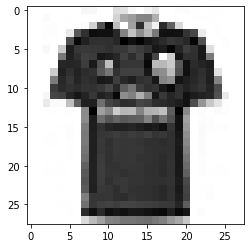

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Probabilities:
 [4.81062362e-139 5.98077657e-093 6.85030429e-034 3.37379046e-029
 6.42720470e-098 6.26407462e-124 1.44578847e-046 1.42933191e-149
 1.00000000e+000 1.79979553e-077]
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  1.00 
p(9):  0.00 


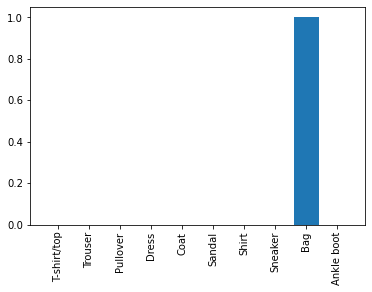

Do you wish to see performance on the next test digit? y/nn


In [7]:
#categorical 
cnb = CategoricalNB(min_categories=256)
cnb.fit(X_train, Y_train, sample_weight=None)
Y_pred = cnb.predict(X_test.to_numpy())
Y_predprob = cnb.predict_proba(np.array(X_test))
C_cnb = confusion_matrix(Y_test,Y_pred)
print("\nCategorical Distribution confusion matrix:\n", C_cnb)
r_cnb = sum(C_cnb.diagonal())/C_cnb.sum()
print("\nCategorical Distribution Accuracy Rate=",r_cnb)
print("\nCategorical Distribution Error Rate=",1-r_cnb)
print("\nCategorical Distribution Classification report\n", classification_report(Y_test, Y_pred))

for i in range(len(Y_test)):    
    if input("Do you wish to see performance on the next test digit? y/n")=='n':       
        break    
    plt.imshow(np.array(X_test.iloc[i]).reshape((28,28)),cmap=plt.cm.binary)    
    plt.show()    
    print("Actual value: ",Y_test[i], "  predicted value: ", Y_pred[i])    
    print("Probabilities:\n", Y_predprob[i])
    print("Predicted probability distribution:\n")    
    [print("p(%d): %5.2f "% (j, Y_predprob[i,j])) for j in range(Y_predprob.shape[1])]    
    plt.bar(height=Y_predprob[i],x=name)
    plt.xticks(rotation = 90)
    plt.show()

# KNN with Cross Val

{'n_neighbors': 11}
Best score is: 0.7765000000000001


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008177,0.003787,0.034555,0.004323,1,{'n_neighbors': 1},0.7725,0.7850,0.7925,0.7500,...,0.7750,0.014405,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.006349,0.000106,0.035657,0.001295,11,{'n_neighbors': 11},0.7750,0.7900,0.7875,0.7700,...,0.7765,0.011136,1,0.808750,0.801875,0.810000,0.810000,0.809375,0.808000,0.003097
2,0.006341,0.000027,0.036048,0.001728,21,{'n_neighbors': 21},0.7400,0.7575,0.7600,0.7300,...,0.7455,0.011446,3,0.774375,0.775000,0.775000,0.773750,0.772500,0.774125,0.000935
3,0.006267,0.000127,0.037786,0.001317,31,{'n_neighbors': 31},0.7325,0.7625,0.7475,0.7200,...,0.7370,0.016000,4,0.760625,0.756250,0.761875,0.756250,0.765625,0.760125,0.003566
4,0.006294,0.000104,0.036524,0.001911,41,{'n_neighbors': 41},0.7425,0.7400,0.7450,0.7175,...,0.7320,0.012981,5,0.751875,0.741250,0.750625,0.758125,0.761250,0.752625,0.006908
5,0.006329,0.000022,0.036820,0.001127,51,{'n_neighbors': 51},0.7375,0.7350,0.7350,0.7225,...,0.7305,0.006595,6,0.743750,0.737500,0.745625,0.740000,0.751875,0.743750,0.004953
6,0.006375,0.000067,0.037171,0.000889,61,{'n_neighbors': 61},0.7325,0.7250,0.7375,0.7150,...,0.7255,0.008573,7,0.735625,0.729375,0.736875,0.735000,0.735625,0.734500,0.002634
7,0.006341,0.000090,0.036908,0.001237,71,{'n_neighbors': 71},0.7400,0.7275,0.7300,0.7075,...,0.7225,0.012942,8,0.731875,0.721250,0.726250,0.725625,0.734375,0.727875,0.004687
8,0.006382,0.000126,0.036266,0.001296,81,{'n_neighbors': 81},0.7250,0.7125,0.7150,0.7075,...,0.7130,0.006964,9,0.728125,0.708750,0.722500,0.725625,0.724375,0.721875,0.006812
9,0.006289,0.000112,0.038723,0.002782,91,{'n_neighbors': 91},0.7175,0.7225,0.7175,0.7025,...,0.7105,0.011225,10,0.720625,0.710625,0.709375,0.723750,0.719375,0.716750,0.005706



KNN confusion matrix:
 [[45  0  0  0  0  0  0  2  0  0]
 [ 0 36  0  1  4  1  1  0  0  0]
 [ 0  0 42  5  4  0  4  0  0  0]
 [ 0  0  2 42  0  0  0  0  1  1]
 [ 0  0 17  0 40  0  4  0  2  0]
 [ 2  3  0  0  0 37  1  9  0  0]
 [ 0  0  7  0 10  0 22  0 10  0]
 [ 7  0  0  0  0  0  0 45  0  0]
 [ 0  0  1  3  2  0  5  0 42  0]
 [ 0  0  0  1  1  0  0  0  0 38]]

KNN Accuracy Rate= 0.778
{'n_neighbors': 11}
Best score is: 0.7765000000000001


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006359,0.000106,0.031771,0.001310,1,{'n_neighbors': 1},0.7725,0.7850,0.7925,0.7500,...,0.7750,0.014405,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.006481,0.000037,0.035873,0.001706,11,{'n_neighbors': 11},0.7750,0.7900,0.7875,0.7700,...,0.7765,0.011136,1,0.808750,0.801875,0.810000,0.810000,0.809375,0.808000,0.003097
2,0.006458,0.000010,0.037216,0.000584,21,{'n_neighbors': 21},0.7400,0.7575,0.7600,0.7300,...,0.7455,0.011446,3,0.774375,0.775000,0.775000,0.773750,0.772500,0.774125,0.000935
3,0.006447,0.000028,0.035812,0.001478,31,{'n_neighbors': 31},0.7325,0.7625,0.7475,0.7200,...,0.7370,0.016000,4,0.760625,0.756250,0.761875,0.756250,0.765625,0.760125,0.003566
4,0.006497,0.000103,0.035816,0.001284,41,{'n_neighbors': 41},0.7425,0.7400,0.7450,0.7175,...,0.7320,0.012981,5,0.751875,0.741250,0.750625,0.758125,0.761250,0.752625,0.006908
5,0.006503,0.000175,0.039723,0.005855,51,{'n_neighbors': 51},0.7375,0.7350,0.7350,0.7225,...,0.7305,0.006595,6,0.743750,0.737500,0.745625,0.740000,0.751875,0.743750,0.004953
6,0.006784,0.000414,0.037153,0.000922,61,{'n_neighbors': 61},0.7325,0.7250,0.7375,0.7150,...,0.7255,0.008573,7,0.735625,0.729375,0.736875,0.735000,0.735625,0.734500,0.002634
7,0.006594,0.000186,0.036450,0.001490,71,{'n_neighbors': 71},0.7400,0.7275,0.7300,0.7075,...,0.7225,0.012942,8,0.731875,0.721250,0.726250,0.725625,0.734375,0.727875,0.004687
8,0.006480,0.000021,0.036389,0.001501,81,{'n_neighbors': 81},0.7250,0.7125,0.7150,0.7075,...,0.7130,0.006964,9,0.728125,0.708750,0.722500,0.725625,0.724375,0.721875,0.006812
9,0.006514,0.000041,0.037005,0.001863,91,{'n_neighbors': 91},0.7175,0.7225,0.7175,0.7025,...,0.7105,0.011225,10,0.720625,0.710625,0.709375,0.723750,0.719375,0.716750,0.005706



KNN confusion matrix with Normalization:
 [[45  0  0  0  0  0  0  2  0  0]
 [ 0 36  0  1  4  1  1  0  0  0]
 [ 0  0 42  5  4  0  4  0  0  0]
 [ 0  0  2 42  0  0  0  0  1  1]
 [ 0  0 17  0 40  0  4  0  2  0]
 [ 2  3  0  0  0 37  1  9  0  0]
 [ 0  0  7  0 10  0 22  0 10  0]
 [ 7  0  0  0  0  0  0 45  0  0]
 [ 0  0  1  3  2  0  5  0 42  0]
 [ 0  0  0  1  1  0  0  0  0 38]]

KNN Accuracy Rate with Normalization= 0.778


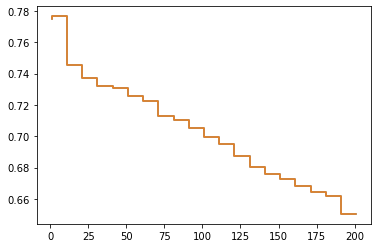

In [11]:
#KNN
knncv = knc()
param_grid = {'n_neighbors': np.arange(1,202,10)}
knn_gscv = GridSearchCV(knncv, param_grid, return_train_score=True, cv=5)

#modeling
knn_gscv.fit(X_train, Y_train)
print(knn_gscv.best_params_)
print("Best score is:",knn_gscv.best_score_)
df = pd.DataFrame(knn_gscv.cv_results_)
display(df)
plt.step(df['param_n_neighbors'],df['mean_test_score'])

#prediction
Y_pred = knn_gscv.predict(X_test)

#accuracy measures
C_knn = confusion_matrix(Y_test,Y_pred)
print("\nKNN confusion matrix:\n", C_knn)
r_knn = sum(C_knn.diagonal())/C_knn.sum()
print("\nKNN Accuracy Rate=",r_knn)

#Normalization 
X_train_s = X_train/256
X_test_s = X_test/256



knn_gscv.fit(X_train_s, Y_train)
print(knn_gscv.best_params_)
print("Best score is:",knn_gscv.best_score_)
df = pd.DataFrame(knn_gscv.cv_results_)
display(df)
plt.step(df['param_n_neighbors'],df['mean_test_score'])

#prediction
Y_pred_s = knn_gscv.predict(X_test_s)

#accuracy measures
C_knn = confusion_matrix(Y_test,Y_pred_s)
print("\nKNN confusion matrix with Normalization:\n", C_knn)
r_knn = sum(C_knn.diagonal())/C_knn.sum()
print("\nKNN Accuracy Rate with Normalization=",r_knn)



# CART


Cart D:5 L:1000 confusion matrix:
 [[ 0  0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0 28  0  0 15  0  0]
 [ 0  0  0  0 52  0  0  3  0  0]
 [ 0  0  0  0 12  0  0 34  0  0]
 [ 0  0  0  0 63  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 52  0  0]
 [ 0  0  0  0 43  0  0  6  0  0]
 [ 0  0  0  0  0  0  0 52  0  0]
 [ 0  0  0  0 49  0  0  4  0  0]
 [ 0  0  0  0  1  0  0 39  0  0]]

Cart D:5 L:1000 Accuracy Rate= 0.23

Accuracy report
               precision    recall  f1-score   support

  Ankle boot       0.00      0.00      0.00        47
         Bag       0.00      0.00      0.00        43
        Coat       0.00      0.00      0.00        55
       Dress       0.00      0.00      0.00        46
    Pullover       0.25      1.00      0.41        63
      Sandal       0.00      0.00      0.00        52
       Shirt       0.00      0.00      0.00        49
     Sneaker       0.21      1.00      0.34        52
 T-shirt/top       0.00      0.00      0.00        53
     Trouser       0.00      0.00    

/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


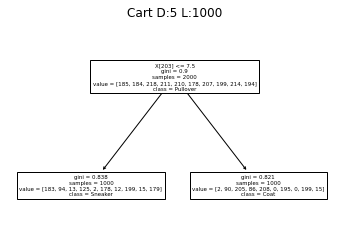

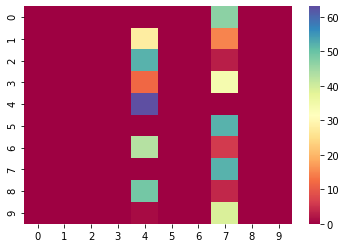


Cart D:10 L:1000 confusion matrix:
 [[ 0  0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0 28  0  0 15  0  0]
 [ 0  0  0  0 52  0  0  3  0  0]
 [ 0  0  0  0 12  0  0 34  0  0]
 [ 0  0  0  0 63  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 52  0  0]
 [ 0  0  0  0 43  0  0  6  0  0]
 [ 0  0  0  0  0  0  0 52  0  0]
 [ 0  0  0  0 49  0  0  4  0  0]
 [ 0  0  0  0  1  0  0 39  0  0]]

Cart D:10 L:1000 Accuracy Rate= 0.23

Accuracy report
               precision    recall  f1-score   support

  Ankle boot       0.00      0.00      0.00        47
         Bag       0.00      0.00      0.00        43
        Coat       0.00      0.00      0.00        55
       Dress       0.00      0.00      0.00        46
    Pullover       0.25      1.00      0.41        63
      Sandal       0.00      0.00      0.00        52
       Shirt       0.00      0.00      0.00        49
     Sneaker       0.21      1.00      0.34        52
 T-shirt/top       0.00      0.00      0.00        53
     Trouser       0.00      0.00  

/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


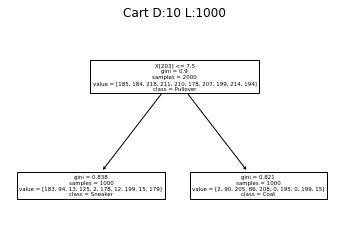

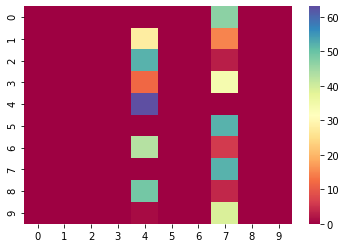


Cart D:5 L:2000 confusion matrix:
 [[ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0 63  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]]

Cart D:5 L:2000 Accuracy Rate= 0.11

Accuracy report
               precision    recall  f1-score   support

  Ankle boot       0.00      0.00      0.00        47
         Bag       0.00      0.00      0.00        43
        Coat       0.11      1.00      0.20        55
       Dress       0.00      0.00      0.00        46
    Pullover       0.00      0.00      0.00        63
      Sandal       0.00      0.00      0.00        52
       Shirt       0.00      0.00      0.00        49
     Sneaker       0.00      0.00      0.00        52
 T-shirt/top       0.00      0.00      0.00        53
     Trouser       0.00      0.00    

/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


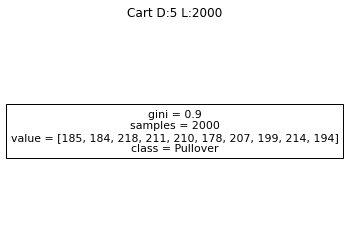

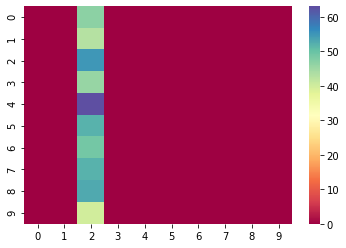


Cart D:10 L:2000 confusion matrix:
 [[ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0 63  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]]

Cart D:10 L:2000 Accuracy Rate= 0.11

Accuracy report
               precision    recall  f1-score   support

  Ankle boot       0.00      0.00      0.00        47
         Bag       0.00      0.00      0.00        43
        Coat       0.11      1.00      0.20        55
       Dress       0.00      0.00      0.00        46
    Pullover       0.00      0.00      0.00        63
      Sandal       0.00      0.00      0.00        52
       Shirt       0.00      0.00      0.00        49
     Sneaker       0.00      0.00      0.00        52
 T-shirt/top       0.00      0.00      0.00        53
     Trouser       0.00      0.00  

/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


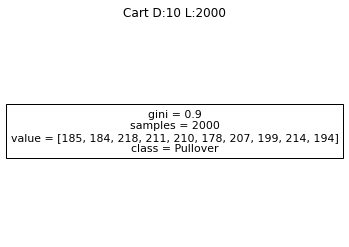

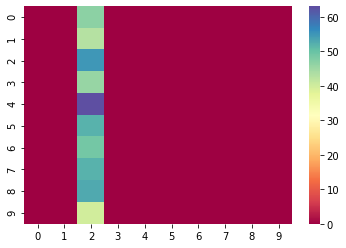

In [12]:
#CART
cart1 = cart(max_depth=5, min_samples_leaf=1000)
cart1.fit(X_train, Y_train)
Y_pred = cart1.predict(X_test)
Y_predprob = cart1.predict_proba(X_test)
C_cart = confusion_matrix(Y_test,Y_pred)
print("\nCart D:5 L:1000 confusion matrix:\n", C_cart)
r_cart = sum(C_cart.diagonal())/C_cart.sum()
print("\nCart D:5 L:1000 Accuracy Rate=",r_cart)
print("\nAccuracy report\n", classification_report(Y_test, Y_pred))
plot_tree(cart1, class_names = name)
plt.title("Cart D:5 L:1000")
plt.show()
sb.heatmap(C_cart,cmap='Spectral')
plt.show()


cart2 = cart(max_depth=10, min_samples_leaf=1000)
cart2.fit(X_train, Y_train)
Y_pred = cart2.predict(X_test)
Y_predprob = cart2.predict_proba(X_test)
C_cart = confusion_matrix(Y_test,Y_pred)
print("\nCart D:10 L:1000 confusion matrix:\n", C_cart)
r_cart = sum(C_cart.diagonal())/C_cart.sum()
print("\nCart D:10 L:1000 Accuracy Rate=",r_cart)
print("\nAccuracy report\n", classification_report(Y_test, Y_pred))
plot_tree(cart2, class_names = name)
plt.title("Cart D:10 L:1000")
plt.show()
sb.heatmap(C_cart,cmap='Spectral')
plt.show()


cart3 = cart(max_depth=5, min_samples_leaf=2000)
cart3.fit(X_train, Y_train)
Y_pred = cart3.predict(X_test)
Y_predprob = cart3.predict_proba(X_test)
C_cart = confusion_matrix(Y_test,Y_pred)
print("\nCart D:5 L:2000 confusion matrix:\n", C_cart)
r_cart = sum(C_cart.diagonal())/C_cart.sum()
print("\nCart D:5 L:2000 Accuracy Rate=",r_cart)
print("\nAccuracy report\n", classification_report(Y_test, Y_pred))
plot_tree(cart3, class_names = name)
plt.title("Cart D:5 L:2000")
plt.show()
sb.heatmap(C_cart,cmap='Spectral')
plt.show()


cart4 = cart(max_depth=10, min_samples_leaf=2000)
cart4.fit(X_train, Y_train)
Y_pred = cart4.predict(X_test)
Y_predprob = cart4.predict_proba(X_test)
C_cart = confusion_matrix(Y_test,Y_pred)
print("\nCart D:10 L:2000 confusion matrix:\n", C_cart)
r_cart = sum(C_cart.diagonal())/C_cart.sum()
print("\nCart D:10 L:2000 Accuracy Rate=",r_cart)
print("\nAccuracy report\n", classification_report(Y_test, Y_pred))
plot_tree(cart4, class_names = name)
plt.title("Cart D:10 L:2000")
plt.show()
sb.heatmap(C_cart,cmap='Spectral')
plt.show()



# Random Forest

In [13]:
Ranfor=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=1,oob_score=True)
Ranfor.fit(X_train,Y_train)
Y_pred=Ranfor.predict(X_test)
Y_predprob=Ranfor.predict_proba(X_test)
print("\n Out of Bag score = " ,{Ranfor.oob_score_})
C_ran = confusion_matrix(Y_test,Y_pred)
ErrorRate = round(1- (sum(C_ran.diagonal())/C_ran.sum()),3)
print("\n Error Rate =",ErrorRate)



 Out of Bag score =  {0.7725}

 Error Rate = 0.23
